<h1 align="center">**Random Forest**</h1>

## Program so far
***
- Basics of Python
- Descreptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering
- Feature selection
- Logistic Regression
- Decision tree

# Table of contents
***
- Shortcomming of Decision tree
- How Random Forest overcome these shortcomings
- Hyperparameters for Random Forests

*****

# Revisiting Decision Trees (1/3)

** Before getting to random forest we will quickly recap about Decision tree. **
- If you remember Decision tree concept, then it is more to the rule based system.
- Given the training dataset with targets and features, the decision tree algorithm will come up with some set of rules.
- The same set rules can be used to perform the prediction on the test dataset.

# Revisiting Decision Trees (2/3)

- We also went through the shortcomings of decision trees
    - They overfit
    - They are structurally unstable

- If you know the decision tree algorithm. You might be thinking are we creating more number of decision trees and how can we create more number of decision trees. As all the calculation of nodes selection will be same for the same dataset.

- Yes. You are true. To model more number of decision trees to create the forest you are not going to use the same apache of constructing the decision with information gain or gini index approach.


# Revisiting Decision Trees (3/3)

- As in random forest algorithm, Instead of using information gain or gini index for calculating the root node, the process of finding the root node and splitting the feature nodes will happen randomly.

- This will be explaining with some example.

## How Random forest Works (1/3)

- Suppose Mady somehow got 2 weeks leave from his office. He wants to spend his 2 weeks by traveling to the different place. He also wants to go to the place he may like.
- So he decided to ask his best friend about the places he may like.
- He asked his best friend, about the places he may like. Then his friend started asking about his past trips and suggested some places.
- Here his best formed the decision tree with the answer given by Mady.

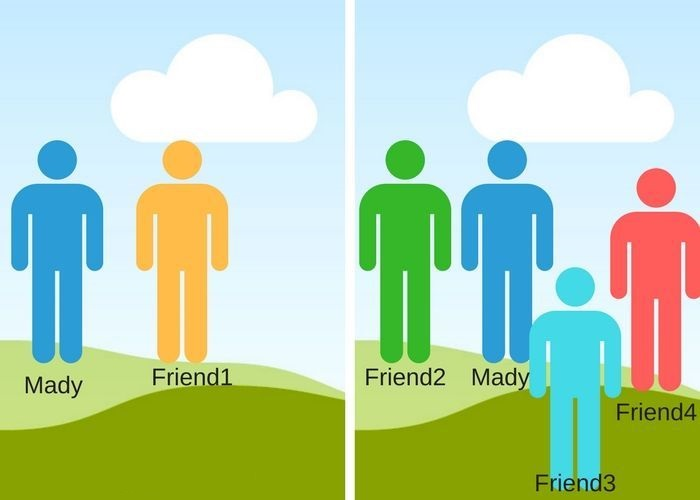

## How Random forest Works (2/3)

- As his best friend may recommend his best place to Mady as a friend. The model will be biased with the closeness of their friendship.
- So he decided to ask few more friends to recommend the best place he may like. Now his friends asked some random questions and each one recommended one place to Mady. 
- Now  Mady considered the place which is high votes from his friends as the final place to visit.
- In the above Mady trip planning, two main interesting algorithms decision tree algorithm and random forest algorithm used. I hope you find it already.

## How Random forest Works (3/3)

- Each friend asked Mady different questions and come up their recommend a place to visit. 
- Later mady consider all the recommendations and calculated the votes. Votes basically is to pick the popular place from the recommend places from all his friends.
- Mady will consider each recommended place and if the same place recommended by some other place he will increase the count. At the end the high count place where mady will go.
- This is the basic opteration how random forest works.


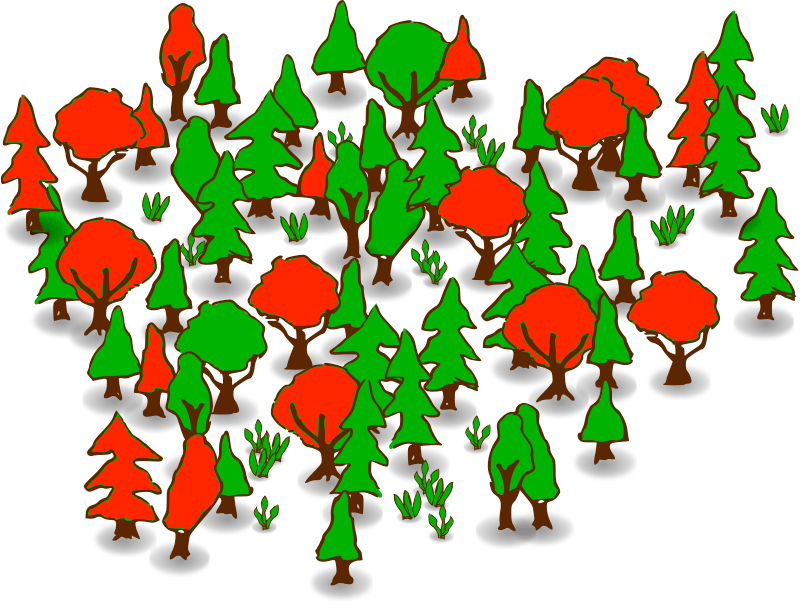

## Random Forest Algorithm

* Decision trees involve the greedy selection of the best split point from the dataset at each step.

- This algorithm makes decision trees susceptible to high variance if they are not pruned. 
- This high variance can be harnessed and reduced by creating multiple trees with different samples of the training dataset (different views of the problem) and combining their predictions. 
- This approach is called bootstrap aggregation or bagging for short.


- A limitation of bagging is that the same greedy algorithm is used to create each tree, 
- This means that it is likely that the same or very similar split points will be chosen in each tree making the different trees very similar (trees will be correlated). 
- This, in turn, makes their predictions similar, mitigating the variance originally sought.

- We can force the decision trees to be different by limiting the features (rows) that the greedy algorithm can evaluate at each split point when creating the tree. 
** This is called the Random Forest algorithm. **

**To deep dive into RandomForest click [here](http://www.analyticbridge.datasciencecentral.com/profiles/blogs/random-forest-in-python)

** Now We will see how to build a Random forest model with sklearn pacakage for Loan prediction dataset.**

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [2]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('./data/loan_prediction.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
np.random.seed(9)
            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [6]:
pd.Categorical(dataframe['Loan_Status']).describe()

,counts,freqs
categories,,
0,192,0.312704
1,422,0.687296


- Now we'll make a simple ensemble to see how they work.

- Let's create two decision trees for our model with slightly different parameters:

### One with min_samples_leaf set to 2
### One with max_depth set to 5

In [7]:
#model for tuning the min samples of leaf
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [8]:
# predicting for min_samples 0f leaf as 2.

y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.

y_clf_2 = clf_2.predict(X_test)

In [9]:
#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))


Accuracy score of the model with min sample leaf 2 is: 0.7135135135135136
roc_auc_score of the model1 is: 0.6487179487179487


Accuracy score of the model with max depth 5 is: 0.7243243243243244
roc_auc_score of the model2 is: 0.65


## variation in the performance of the model
- In the above code we have used 2 different parameters for checking the performance of the models
- The variation in the **accuracy** and the **roc_auc score** of the models is varying indicating the increase in the performance of the model by tweaking the parameters

## The main weaknesses of using a random forest are:

They're difficult to interpret 
- Because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.
- They take longer to create - Making two trees takes twice as long as making one, making three takes three times as long, and so on. 
- Fortunately, we can exploit multicore processors to parallelize tree construction. 
- Scikit allows us to do this through the n_jobs parameter on RandomForestClassifier. 

# task 
* see the performance by changing the **n_jobs** in parameters input to see the difference for parallel construction of trees

## Deciding the number of trees to build 
* When we instantiate a RandomForestClassifier, we pass in an **n_estimators** parameter that indicates how many trees to build. 
* While adding more trees usually improves accuracy, it also increases the overall time the model takes to train.
* RandomForestClassifier has a similar interface to DecisionTreeClassifier, and we can use the fit() and predict() methods to train and make predictions.
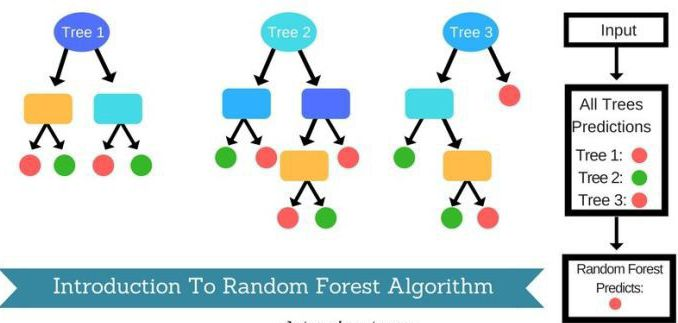

## Criterion to split the nodes
- **Criterion** is the function to measure the quality of a split. 
- Supported criteria are **“gini”** for the Gini impurity and **“entropy”** for the information gain. 
***
- To understand how splits work, let's look at information gain or entropy. 
- Entropy is the measure of "disorder" in the data set. If a dataset has all the same labels, they'll have low entropy. 
- If all the labels are different, they'll have high entropy. 
- Splits that give us more information about the data, will ideally minimize entropy. 
- In other words, the tree will ideally split the labels into distinct groups with as little mixture possible. This'll allow the splits to give our tree more predictive power.

## Entropy
Here p and q is probability of success and failure respectively in that node. Entropy is also used with categorical variable. It chooses the split which has lowest entropy compared to parent node and other splits. The lesser the entropy, the better it is.  

Steps for Entropy :
Calculate entropy of the parent node
Calculate entropy of each individual node of split and calculate the weighted average of all sub-nodes available in the split.

In [10]:
clf_entropy = RandomForestClassifier(n_estimators=90, criterion='entropy',random_state=9)
clf_entropy.fit(X_train,y_train)

y_prediction_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_prediction_entropy)

accuracy_entropy

0.72432432432432436

## Gini Index
* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split.
* It measures how often a randomly chosen element would be incorrectly identified.
* A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 1.0 (for a 2 class problem).

In [11]:
clf_gini = RandomForestClassifier(n_estimators=90, criterion='gini', random_state=9)
clf_gini.fit(X_train,y_train)

y_prediction_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_prediction_gini)

accuracy_gini

0.7189189189189189

- Random forests tend to be much more accurate than simple models like linear regression. 
- Due to the way random forests are constructed, they tend to overfit much less than decision trees. 
- Random forests can still be prone to overfitting, though, so it's important to tune parameters like **maximum depth** and **minimum samples per leaf**.

## Hyper parameter tuning


* Similar to decision trees, we can tweak some of the parameters for random forests:
***
     parameter = {
                'n_estimators': [ ], 
                  'max_features': [], 
                  'criterion': [],
                  'max_depth': ,
                  'min_samples_split': [ ],
                  'min_samples_leaf': [ ] 
               } 
                 

### Tweaking parameters can increase the accuracy of the forest. 
* These parameters apply to the individual trees in the model, and change how they are constructed. 

n_estimators
bootstrap - "Bootstrap aggregation" is another name for bagging; this parameter indicates whether to turn it on (Defaults to True)
Refer to the documentation for a full list of parameters.

In [12]:
# Defined a function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_t, Y_t):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj

In [78]:
#plot mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in grid_obj.param_grid.values()]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores,c='r')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g')
    plt.xlabel(grid_obj.param_grid.keys()[0])
    plt.ylabel('mean scores')
    plt.show()

In [80]:
classifier = RandomForestClassifier(random_state=9)

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

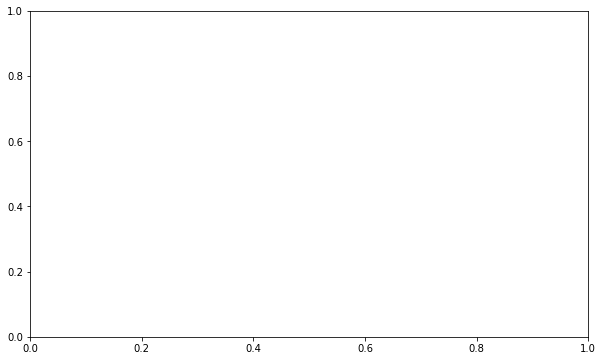

In [81]:
# plotting the graph to find the variation in model for given n_estimators

grid = gridfunc(classifier,{'n_estimators': [10,50,100,150,200,300]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X_train, y_train)
hp_cv_scores(grid)

In [ ]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

In [92]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6]
             }

In [93]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

#grid.cv_results_

In [94]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [95]:
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1], dtype=int64)

In [99]:
from sklearn.metrics import confusion_matrix
pred = pd.DataFrame(pred)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
roc_auc_score(y_test, pred)

[[ 28  37]
 [ 10 110]]
0.745945945946


0.67371794871794866

## Final overview
* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features. 
* This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model. 

- Random Forests can be easily deployed in a distributed fashion due to the fact that they can run in parallel and for imbalanced data Random Forest stratifys the sampling.
- And it is true that they are more robust to overfitting and require less tuning to avoid it.

## post reads
***
* [Splitting criterion to improve precision and recall](https://medium.com/airbnb-engineering/confidence-splitting-criterions-can-improve-precision-and-recall-in-random-forest-classifiers-ad2d4ba696a4)